## Import modules

In [1]:
import sys
sys.path.append('/home/malthera/Documents/IDDEFIX')

import numpy as np
import matplotlib.pyplot as plt
import iddefix

SyntaxError: non-default argument follows default argument (framework.py, line 24)

# Simulation data example

This example features CST simulated wakefield data of the "Accelerator Cavity" introductory example.

## Fitting on fully decayed wakefield

### Import data

In [2]:
# Importing impedance data
data_fully_decayed = np.loadtxt('data/002_impedance_acceleratorCavity_fully_decayed.txt', comments='#', delimiter='\t')

# Extracting frequency and impedance

frequency = data_fully_decayed[:,0]*1e9 # Convert to GHz
real_impedance = data_fully_decayed[:,1]
imag_impedance = data_fully_decayed[:,2]

impedance_fd = real_impedance + 1j*imag_impedance


Visually inspecting the impedance

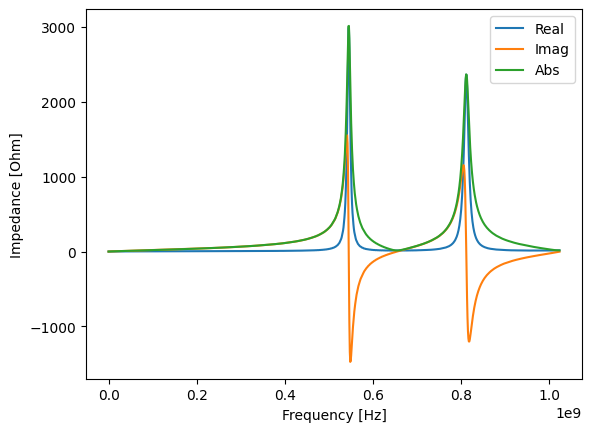

In [3]:
plt.plot(frequency, impedance_fd.real, label='Real')
plt.plot(frequency, impedance_fd.imag, label='Imag')
plt.plot(frequency, np.abs(impedance_fd), label='Abs')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohm]')
plt.legend()

### Fitting resonators with IDDEFIX on the absolute magnitude of the 3 resonator impdance spectrum

In [4]:
# Setting amount of resonators to fit

Nres = 2

# Bounds on resonators parameters
""" Bounds have this format [(Rs_min, Rs_max), (Q_min, Q_max), (fres_min, fres_max)].
ParameterBounds allows us to manually add a resonator with desired parameters """

bounds = [(1e3, 1e4), (1, 1e3), (0.4e9, 0.9e9)] # Bounds have this format [(Rs_min, Rs_max), (Q_min, Q_max), (fres_min, fres_max)].
parameterBounds = Nres * bounds

#### Running IDDEFIX DE
Running the DE algorithm with IDDEFIX and chosen parameters.

In [5]:
%%time
DE_model_fd = iddefix.EvolutionaryAlgorithm(frequency, 
                                         impedance_fd,
                                         N_resonators=Nres, 
                                         parameterBounds=parameterBounds,
                                         plane="longitudinal", 
                                         objectiveFunction=iddefix.ObjectiveFunctions.sumOfSquaredError)

DE_model_fd.run_differential_evolution(maxiter=30000,
                                    popsize=30,
                                    tol=0.01,
                                    mutation=(0.4, 1.0),
                                    crossover_rate=0.7)
print(DE_model_fd.warning)


Optimization Progress:   1%|          | 219/30000 [00:01<03:44, 132.62it/s]



----------------------------------------------------------------------
Resonator |   Rs [Ohm/m or Ohm]    |        Q         |    fres [Hz]     
----------------------------------------------------------------------
    1     |        3.05e+03        |      70.21       |    5.453e+08     
    2     |        2.35e+03        |      64.31       |    8.123e+08     
----------------------------------------------------------------------
Optimization terminated successfully.
CPU times: user 1.47 s, sys: 264 ms, total: 1.74 s
Wall time: 1.66 s


#### Minimization step
To further refine the solution obtained by the DE algorithm, a second optimization step is applied using the Nelder-Mead minimization algorithm. This additional step starts with the results from the DE algorithm as the initial guess and iteratively adjusts the parameters
within a predefined range of 10% above or below their original values. By doing so, the
Nelder-Mead algorithm fine-tunes the solution to reduce the error further, leveraging its
capability to explore the local parameter space efficiently. This two-step optimization ap-
proach ensures a more precise fit by combining the global search power of DE with the local
refinement capabilities of Nelder-Mead.

In [6]:
DE_model_fd.run_minimization_algorithm()

Method for minimization : Nelder-Mead


----------------------------------------------------------------------
Resonator |   Rs [Ohm/m or Ohm]    |        Q         |    fres [Hz]     
----------------------------------------------------------------------
    1     |        3.03e+03        |      69.88       |    5.453e+08     
    2     |        2.36e+03        |      64.55       |    8.123e+08     
----------------------------------------------------------------------


### Assesing the fitting visually

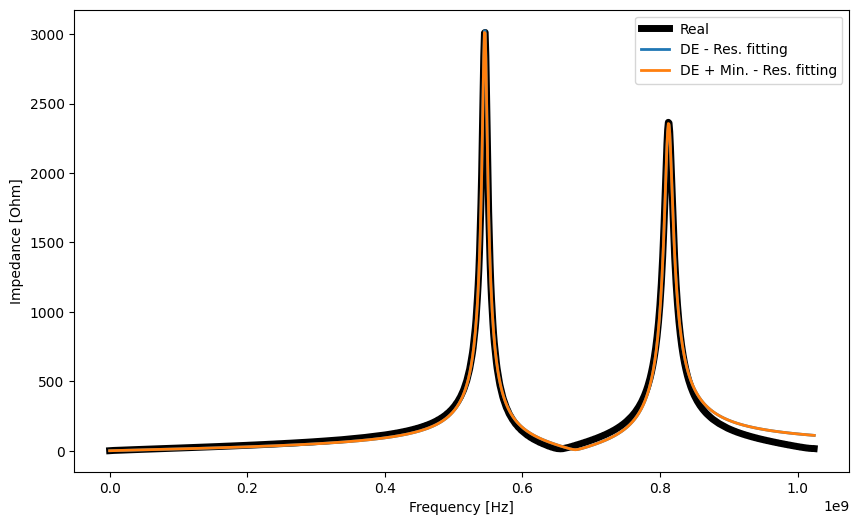

In [7]:
plt.figure(figsize=(10, 6))
result_DE = np.abs(iddefix.Impedances.n_Resonator_longitudinal_imp(frequency, dict(enumerate(DE_model_fd.evolutionParameters.reshape(-1, 3)))))
result_DE_MIN = np.abs(iddefix.Impedances.n_Resonator_longitudinal_imp(frequency, dict(enumerate(DE_model_fd.minimizationParameters.reshape(-1, 3)))))

plt.plot(frequency, np.abs(impedance_fd), lw=5, label='Real', color='black')
plt.plot(frequency, result_DE,  lw=2, label='DE - Res. fitting')
plt.plot(frequency, result_DE_MIN,  lw=2, label='DE + Min. - Res. fitting')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohm]')
plt.legend()

## Fitting on partially decayed wakefield

### Import data

In [8]:
# Importing impedance data
data_partially_decayed = np.loadtxt('data/002_impedance_acceleratorCavity_partially_decayed.txt', comments='#', delimiter='\t')

# Extracting frequency and impedance

frequency = data_partially_decayed[:,0]*1e9 # Convert to GHz
real_impedance = data_partially_decayed[:,1]
imag_impedance = data_partially_decayed[:,2]

impedance_pd = real_impedance + 1j*imag_impedance

Visually inspecting the impedance

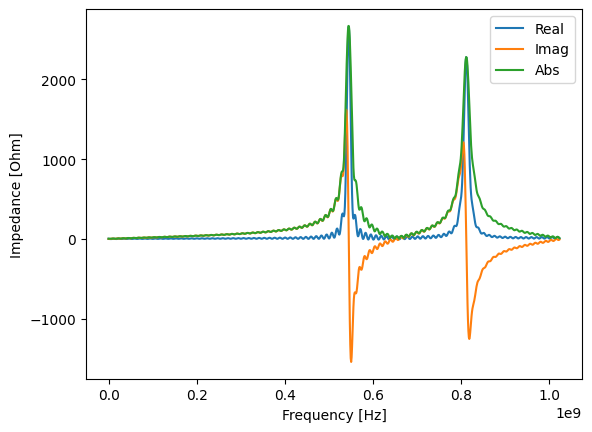

In [9]:
plt.plot(frequency, impedance_pd.real, label='Real')
plt.plot(frequency, impedance_pd.imag, label='Imag')
plt.plot(frequency, np.abs(impedance_pd), label='Abs')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohm]')
plt.legend()

### Fitting resonators with IDDEFIX on the absolute magnitude of the 3 resonator impdance spectrum

In [10]:
# Setting amount of resonators to fit

Nres = 2

# Bounds on resonators parameters
""" Bounds have this format [(Rs_min, Rs_max), (Q_min, Q_max), (fres_min, fres_max)].
ParameterBounds allows us to manually add a resonator with desired parameters """

bounds = [(1e3, 1e4), (1, 1e3), (0.4e9, 0.9e9)] # Bounds have this format [(Rs_min, Rs_max), (Q_min, Q_max), (fres_min, fres_max)].
parameterBounds = Nres * bounds

#### Running IDDEFIX DE
Running the DE algorithm with IDDEFIX and chosen parameters.

In [11]:
%%time
DE_model_pd = iddefix.EvolutionaryAlgorithm(frequency, 
                                         impedance_pd,
                                         N_resonators=Nres, 
                                         parameterBounds=parameterBounds,
                                         plane="longitudinal", 
                                         wake_length=25.4,
                                         objectiveFunction=iddefix.ObjectiveFunctions.sumOfSquaredError)

DE_model_pd.run_differential_evolution(maxiter=30000,
                                    popsize=30,
                                    tol=0.01,
                                    mutation=(0.4, 1.0),
                                    crossover_rate=0.7)
print(DE_model_pd.warning)


Optimization Progress:   1%|          | 243/30000 [00:02<04:34, 108.26it/s]



----------------------------------------------------------------------
Resonator |   Rs [Ohm/m or Ohm]    |        Q         |    fres [Hz]     
----------------------------------------------------------------------
    1     |        3.05e+03        |      71.92       |    5.452e+08     
    2     |        2.38e+03        |      64.95       |    8.123e+08     
----------------------------------------------------------------------
Optimization terminated successfully.
CPU times: user 1.77 s, sys: 267 ms, total: 2.04 s
Wall time: 2.25 s


#### Minimization step
To further refine the solution obtained by the DE algorithm, a second optimization step is applied using the Nelder-Mead minimization algorithm.

In [12]:
DE_model_pd.run_minimization_algorithm()

Method for minimization : Nelder-Mead


----------------------------------------------------------------------
Resonator |   Rs [Ohm/m or Ohm]    |        Q         |    fres [Hz]     
----------------------------------------------------------------------
    1     |        3.05e+03        |      71.79       |    5.453e+08     
    2     |        2.36e+03        |      64.98       |    8.123e+08     
----------------------------------------------------------------------


### Assesing the fitting visually

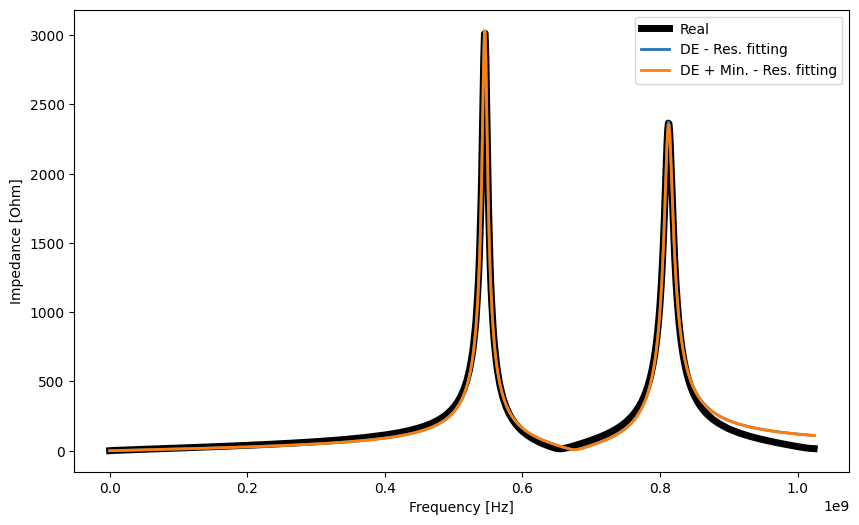

In [15]:
plt.figure(figsize=(10, 6))
result_DE = np.abs(iddefix.Impedances.n_Resonator_longitudinal_imp(frequency, dict(enumerate(DE_model_pd.evolutionParameters.reshape(-1, 3)))))
result_DE_MIN = np.abs(iddefix.Impedances.n_Resonator_longitudinal_imp(frequency, dict(enumerate(DE_model_pd.minimizationParameters.reshape(-1, 3)))))

plt.plot(frequency, np.abs(impedance_fd), lw=5, label='Real', color='black')
plt.plot(frequency, result_DE,  lw=2, label='DE - Res. fitting')
plt.plot(frequency, result_DE_MIN,  lw=2, label='DE + Min. - Res. fitting')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohm]')
plt.legend()